# Car Price Prediction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Preparation

In [2]:
# Load the dataset
df = pd.read_csv('car_price.csv')
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [4]:
# Clean column names
df.columns = df.columns.str.lower().str.replace(' ', '_')
df.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity', 'msrp'],
      dtype='object')

In [5]:
object_columns = df.dtypes[df.dtypes == 'object'].index
object_columns

Index(['make', 'model', 'engine_fuel_type', 'transmission_type',
       'driven_wheels', 'market_category', 'vehicle_size', 'vehicle_style'],
      dtype='object')

In [6]:
# Clean object-type columns
for col in object_columns:
    df[col] = df[col].str.lower().str.replace(' ', '_')

df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


## EDA (Exploratory Data Analysis)

In [7]:
# Explore unique values in each column
for col in df.columns:
    print(f'{col}: {df[col].unique()[:10]}')
    print('unique values:', df[col].nunique())
    print('---')

make: ['bmw' 'audi' 'fiat' 'mercedes-benz' 'chrysler' 'nissan' 'volvo' 'mazda'
 'mitsubishi' 'ferrari']
unique values: 48
---
model: ['1_series_m' '1_series' '100' '124_spider' '190-class' '2_series' '200'
 '200sx' '240sx' '240']
unique values: 914
---
year: [2011 2012 2013 1992 1993 1994 2017 1991 2016 1990]
unique values: 28
---
engine_fuel_type: ['premium_unleaded_(required)' 'regular_unleaded'
 'premium_unleaded_(recommended)' 'flex-fuel_(unleaded/e85)' 'diesel'
 'electric' 'flex-fuel_(premium_unleaded_recommended/e85)' 'natural_gas'
 'flex-fuel_(premium_unleaded_required/e85)'
 'flex-fuel_(unleaded/natural_gas)']
unique values: 10
---
engine_hp: [335. 300. 230. 320. 172. 160. 130. 158. 240. 248.]
unique values: 356
---
engine_cylinders: [ 6.  4.  5.  8. 12.  0. nan 10.  3. 16.]
unique values: 9
---
transmission_type: ['manual' 'automatic' 'automated_manual' 'direct_drive' 'unknown']
unique values: 5
---
driven_wheels: ['rear_wheel_drive' 'front_wheel_drive' 'all_wheel_drive'
 'fou

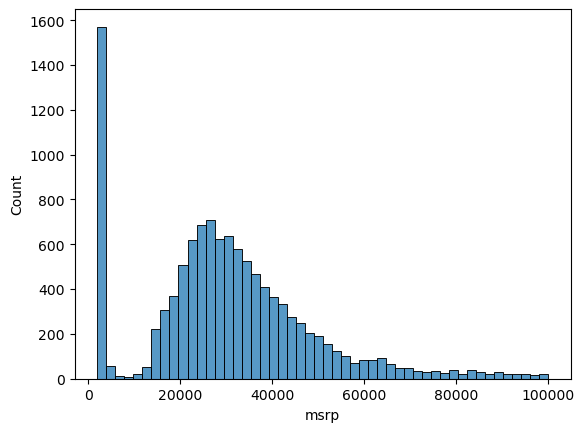

In [8]:
# Distribution of price
sns.histplot(df.msrp[df.msrp < 100000], bins=50)
plt.show()

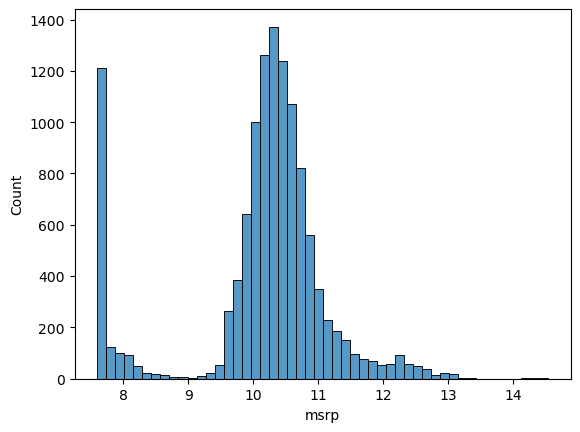

In [9]:
# Log transformation of price
prices_log = np.log1p(df.msrp)
sns.histplot(prices_log, bins=50)
plt.show()

In [10]:
# Check for missing values
df.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

## Split Data for Validation

In [11]:
n = len(df)
n_val = n_test = int(0.2 * n)
n_train = n - n_val - n_test

print('n =', n)
print('n_train =', n_train)
print('n_val =', n_val)
print('n_test =', n_test)

n = 11914
n_train = 7150
n_val = 2382
n_test = 2382


In [14]:
# Shuffle the data
df = df.sample(frac=1, random_state=1).reset_index(drop=True)
df


,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,cadillac,escalade_hybrid,2012,regular_unleaded,332.0,8.0,automatic,four_wheel_drive,4.0,"luxury,hybrid",large,4dr_suv,23,20,1624,85845
1,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657,46895
2,volvo,850,1996,regular_unleaded,222.0,5.0,automatic,front_wheel_drive,4.0,"luxury,performance",midsize,wagon,24,17,870,2000
3,bmw,m2,2016,premium_unleaded_(required),365.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,18,3916,51700
4,rolls-royce,phantom,2014,premium_unleaded_(required),453.0,12.0,automatic,rear_wheel_drive,4.0,"exotic,luxury,performance",large,sedan,19,11,86,474990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,toyota,tundra,2016,regular_unleaded,310.0,8.0,automatic,rear_wheel_drive,4.0,NaN,large,extended_cab_pickup,19,15,2031,30950
11910,audi,90,1994,regular_unleaded,172.0,6.0,manual,all_wheel_drive,4.0,luxury,compact,sedan,22,17,3105,2000
11911,porsche,911,2016,premium_unleaded_(required),560.0,6.0,automated_manual,all_wheel_drive,2.0,"luxury,high-performance",compact,convertible,24,17,1715,194600
11912,lotus,elise,2009,premium_unleaded_(required),189.0,4.0,manual,rear_wheel_drive,2.0,"exotic,high-performance",compact,convertible,27,21,613,43995


In [15]:
# Split Data for Validation
df_val = df.iloc[:n_val]
df_test = df.iloc[n_val:n_val + n_test]
df_train = df.iloc[n_val + n_test:]

In [16]:
display(df_train.head())
display(df_val.head())
display(df_test.head())

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
4764,chevrolet,ss,2016,premium_unleaded_(recommended),415.0,8.0,automatic,rear_wheel_drive,4.0,high-performance,large,sedan,20,14,1385,46575
4765,kia,cadenza,2015,regular_unleaded,293.0,6.0,automatic,front_wheel_drive,4.0,performance,midsize,sedan,28,19,1720,34900
4766,nissan,xterra,2013,regular_unleaded,261.0,6.0,automatic,four_wheel_drive,4.0,NaN,midsize,4dr_suv,20,15,2009,30490
4767,kia,rio,2017,regular_unleaded,138.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,36,27,1720,17905
4768,bmw,3_series,2017,premium_unleaded_(recommended),180.0,4.0,automatic,rear_wheel_drive,4.0,luxury,midsize,sedan,35,23,3916,33450


,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,cadillac,escalade_hybrid,2012,regular_unleaded,332.0,8.0,automatic,four_wheel_drive,4.0,"luxury,hybrid",large,4dr_suv,23,20,1624,85845
1,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657,46895
2,volvo,850,1996,regular_unleaded,222.0,5.0,automatic,front_wheel_drive,4.0,"luxury,performance",midsize,wagon,24,17,870,2000
3,bmw,m2,2016,premium_unleaded_(required),365.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,18,3916,51700
4,rolls-royce,phantom,2014,premium_unleaded_(required),453.0,12.0,automatic,rear_wheel_drive,4.0,"exotic,luxury,performance",large,sedan,19,11,86,474990


,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
2382,plymouth,neon,1999,regular_unleaded,150.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,36,24,535,2000
2383,volvo,850,1995,regular_unleaded,168.0,5.0,manual,front_wheel_drive,4.0,luxury,midsize,wagon,26,18,870,2000
2384,volkswagen,beetle,2015,premium_unleaded_(recommended),210.0,4.0,automated_manual,front_wheel_drive,2.0,"hatchback,performance",compact,2dr_hatchback,30,24,873,29215
2385,kia,spectra,2009,regular_unleaded,138.0,4.0,manual,front_wheel_drive,4.0,NaN,compact,sedan,30,23,1720,16450
2386,acura,slx,1998,regular_unleaded,215.0,6.0,automatic,four_wheel_drive,4.0,luxury,midsize,4dr_suv,18,13,204,2816


In [17]:
# Target variable
y_train = np.log1p(df_train.msrp.values)
y_val = np.log1p(df_val.msrp.values)
y_test = np.log1p(df_test.msrp.values)

del df_train['msrp']
del df_val['msrp']
del df_test['msrp']

In [18]:
display(y_train)
display(y_val)
display(y_test)

array([10.74884067, 10.46027076, 10.32518684, ..., 12.17870659,
       10.691854  , 10.50235153])

array([11.36031027, 10.75568766,  7.60140233, ..., 10.12326545,
       10.46868772, 11.00044848])

array([ 7.60140233,  7.60140233, 10.28247178, ..., 11.09439031,
       10.22940428,  7.60140233])

## Linear Regression

Linear regression is a type of supervised machine-learning algorithm that learns from the labelled datasets and maps the data points with most optimized linear functions which can be used for prediction on new datasets. It assumes that there is a linear relationship between the input and output, meaning the output changes at a constant rate as the input changes. This relationship is represented by a straight line.

### Best Fit Line in Linear Regression

In linear regression, the best-fit line is the straight line that most accurately represents the relationship between the independent variable (input) and the dependent variable (output). It is the line that minimizes the difference between the actual data points and the predicted values from the model.

![linear_regression](./img/image1.png)



![best_fit](./img/image.png)

[Linear Regression in Machine learning](https://www.geeksforgeeks.org/machine-learning/ml-linear-regression/)

[Linear Regression — with numpy](https://medium.com/@mlaniefouesnard/linear-regression-with-numpy-d694a50a5b22)


In [19]:
def linear_regression(X):
    n = len(X)
    b = 10
    m = np.arange(n)
    
    y_pred = b
    
    for i in range(n):
        y_pred += m[i] * X[i]
    
    return y_pred

In [20]:
linear_regression(np.array([200, 3, 4]))

np.int64(21)

The best-fit line will be the one that optimizes the values of m (slope) and b (intercept) so that the predicted y values are as close as possible to the actual data points.

### Linear Regression in Vector Form

![linear_regression_vector](./img/image2.png)


In [21]:
def linear_regression_vector(X):
    n = len(X)
    b = 10
    m = np.arange(n)
    
    # Vectorized implementation
    y_pred = b + np.dot(m, X)
    
    return y_pred

In [22]:
linear_regression(np.array([200, 3, 4]))

np.int64(21)

## Training a Regression Model

To train a Regression Model it is necessary to calculate the weights of the best fit line. The goal is then to isolate the weights to calculate them:

![train](./img/image3.png)


In [23]:
def train_linear_regression(X, y):

    # Add the 1 feature value for the bias term in our feature matrix
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    # Calculate XTX (Gram matrix)
    XTX = X.T.dot(X)
    # Calculate the inverse of the Gram matrix
    XTX_inv = np.linalg.inv(XTX)
    # Extract w
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [24]:
X_train = df_train[['highway_mpg', 'city_mpg', 'popularity']].values
display(X_train)
display(y_train)
print(train_linear_regression(X_train, y_train) )

array([[  20,   14, 1385],
       [  28,   19, 1720],
       [  20,   15, 2009],
       ...,
       [  24,   17, 1715],
       [  27,   21,  613],
       [  25,   18, 1720]])

array([10.74884067, 10.46027076, 10.32518684, ..., 12.17870659,
       10.691854  , 10.50235153])

(np.float64(10.105197680621021), array([ 9.98453960e-03, -1.34934102e-02,  7.16428502e-06]))


## Baseline Model

In [25]:
df_train.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
dtype: object

In [26]:
base = ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity']
df_train[base].isnull().sum()

engine_hp           40
engine_cylinders    15
highway_mpg          0
city_mpg             0
popularity           0
dtype: int64

In [27]:
X_train = df_train[base].fillna(0).values
X_train

array([[ 415.,    8.,   20.,   14., 1385.],
       [ 293.,    6.,   28.,   19., 1720.],
       [ 261.,    6.,   20.,   15., 2009.],
       ...,
       [ 560.,    6.,   24.,   17., 1715.],
       [ 189.,    4.,   27.,   21.,  613.],
       [ 276.,    6.,   25.,   18., 1720.]])

In [28]:
w0, w = train_linear_regression(X_train, y_train)
print(w0, w)

7.885712466457515 [ 9.34805096e-03 -1.36910321e-01  1.68435453e-02  1.27349930e-02
 -1.33860209e-05]


In [29]:
y_pred = w0 + X_train.dot(w)
y_pred

array([11.16649221, 10.49378965, 10.00509512, ..., 12.89694202,
        9.81885776, 10.27160715])

<Axes: ylabel='Count'>

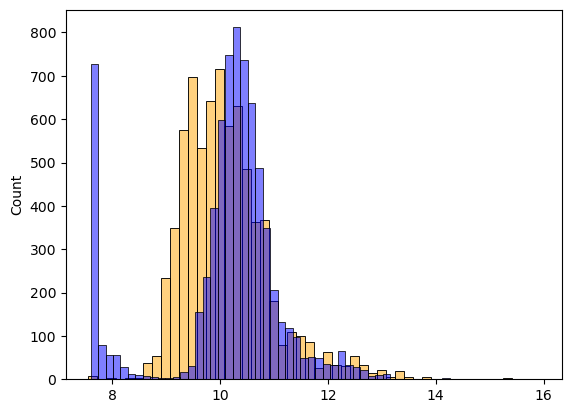

In [30]:
sns.histplot(y_pred, color='orange', alpha=0.5, bins=50)
sns.histplot(y_train, color='blue', alpha=0.5, bins=50)

## Root Mean Square Error (RMSE)

Root Mean Square Error is a metrics used for evaluating the accuracy of regression models. It measures the average size of the errors between predicted and actual values by taking the square root of the mean of squared differences. RMSE helps determine how close the model’s predictions are to real outcomes with lower values indicating better prediction accuracy.

![rmse](./img/image4.png)


In [31]:
def rmse(y, y_pred):
    error = y - y_pred
    mse = (error ** 2).mean()
    rmse = np.sqrt(mse)
    return rmse

In [32]:
rmse(y_train, y_pred)

np.float64(0.7558672494632129)

## Validating the Model

In [33]:
def prepare_X(df):
    base = ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity']
    df_num = df[base].fillna(0)
    X = df_num.values
    return X

In [34]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

np.float64(0.7461669737378137)

## Simple Feature Engineering

In [35]:
df_train.year.max()

2017

In [ ]:
# Calculating the age of the car
2017 - df_train.year

4764      1
4765      2
4766      4
4767      0
4768      0
         ..
11909     1
11910    23
11911     1
11912     8
11913     1
Name: year, Length: 7150, dtype: int64

In [37]:
def prepare_X(df):
    df = df.copy(deep=True)
    df['age'] = 2017 - df.year
    features = ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity', 'age']
    df_num = df[features].fillna(0)
    X = df_num.values
    return X

In [38]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

np.float64(0.5273113662040496)

<Axes: ylabel='Count'>

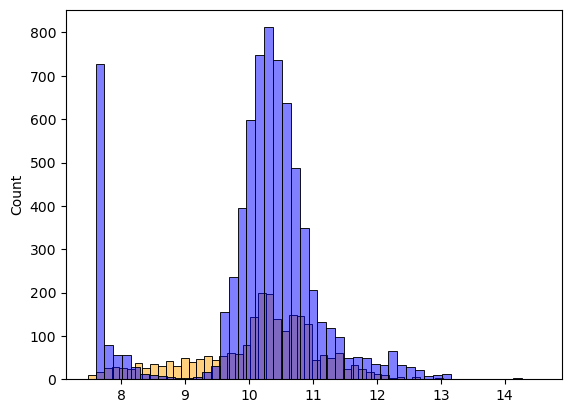

In [39]:
sns.histplot(y_pred, color='orange', alpha=0.5, bins=50)
sns.histplot(y_train, color='blue', alpha=0.5, bins=50)

## Categorical Variables


In [ ]:
# Adding the number of doors as a categorical variable
def prepare_X(df):
    df = df.copy(deep=True)
    df['age'] = 2017 - df.year
    features = ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity', 'age']
    
    for v in [2, 3, 4]:
        df['num_doors_%s' % v] = (df.number_of_doors == v).astype(int)
        features.append('num_doors_%s' % v)
    
    df_num = df[features].fillna(0)
    X = df_num.values
    return X

In [ ]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

# No significant improvement
rmse(y_val, y_pred)

np.float64(0.5256183161315799)

In [54]:
# List the most popular car makes
popular_makes = list(df.make.value_counts().head().index)

In [55]:
# Adding the number of doors as a categorical variable
def prepare_X(df):
    df = df.copy(deep=True)
    df['age'] = 2017 - df.year
    features = ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity', 'age']
    
    for v in [2, 3, 4]:
        df['num_doors_%s' % v] = (df.number_of_doors == v).astype(int)
        features.append('num_doors_%s' % v)
        
    for v in popular_makes:
        df['make_%s' % v] = (df.make == v).astype(int)
        features.append('make_%s' % v)
    
    df_num = df[features].fillna(0)
    X = df_num.values
    return X

In [ ]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

np.float64(0.5179696650166674)

In [61]:
categorical_columns = ['engine_fuel_type', 'transmission_type', 'driven_wheels', 'market_category', 'vehicle_size', 'vehicle_style', 'make']

In [62]:
categories = {}

for c in categorical_columns:
    categories[c] = list(df[c].value_counts().head().index)

categories


{'engine_fuel_type': ['regular_unleaded',
  'premium_unleaded_(required)',
  'premium_unleaded_(recommended)',
  'flex-fuel_(unleaded/e85)',
  'diesel'],
 'transmission_type': ['automatic',
  'manual',
  'automated_manual',
  'direct_drive',
  'unknown'],
 'driven_wheels': ['front_wheel_drive',
  'rear_wheel_drive',
  'all_wheel_drive',
  'four_wheel_drive'],
 'market_category': ['crossover',
  'flex_fuel',
  'luxury',
  'luxury,performance',
  'hatchback'],
 'vehicle_size': ['compact', 'midsize', 'large'],
 'vehicle_style': ['sedan',
  '4dr_suv',
  'coupe',
  'convertible',
  '4dr_hatchback'],
 'make': ['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge']}

In [63]:
# Adding the number of doors as a categorical variable
def prepare_X(df):
    df = df.copy(deep=True)
    df['age'] = 2017 - df.year
    features = ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity', 'age']
    
    for v in [2, 3, 4]:
        df['num_doors_%s' % v] = (df.number_of_doors == v).astype(int)
        features.append('num_doors_%s' % v)
        
    for c, values in categories.items():
        for v in values:
            df['%s_%s' % (c, v)] = (df[c] == v).astype(int)
            features.append('%s_%s' % (c, v))    
    
    df_num = df[features].fillna(0)
    X = df_num.values
    return X

In [65]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

# Extremely worse results
rmse(y_val, y_pred)

np.float64(48.81307801742242)

## Regularization

Regularization is a technique used in machine learning to prevent overfitting and performs poorly on unseen data. By adding a penalty for complexity, regularization encourages simpler, more generalizable models.

- Prevents overfitting: Adds constraints to the model to reduce the risk of memorizing noise in the training data.
- Improves generalization: Encourages simpler models that perform better on new, unseen data.

**[Regularization in Machine Learning](https://www.geeksforgeeks.org/machine-learning/regularization-in-machine-learning/)**  


In [66]:
def train_linear_regression_reg(X, y, r=0.001):

    # Add the 1 feature value for the bias term in our feature matrix
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    # Calculate XTX (Gram matrix)
    XTX = X.T.dot(X)
    
    # Regularization term
    XTX = XTX + r * np.eye(XTX.shape[0])
    
    # Calculate the inverse of the Gram matrix
    XTX_inv = np.linalg.inv(XTX)
    # Extract w
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [76]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression_reg(X_train, y_train, r=0.01)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

np.float64(0.46444788693447914)

<Axes: ylabel='Count'>

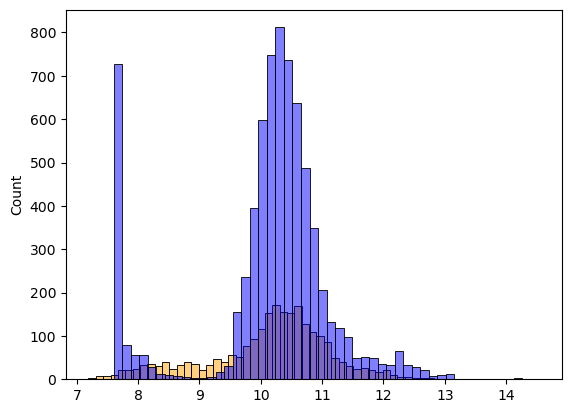

In [77]:
sns.histplot(y_pred, color='orange', alpha=0.5, bins=50)
sns.histplot(y_train, color='blue', alpha=0.5, bins=50)

## Tuning the Model

In [78]:
# Tuning the Model
for r in [0.0001, 0.001, 0.01, 0.1, 1, 10]:
    X_train = prepare_X(df_train)
    w0, w = train_linear_regression_reg(X_train, y_train, r=r)

    X_val = prepare_X(df_val)
    y_pred = w0 + X_val.dot(w)

    score = rmse(y_val, y_pred)
    print('RMSE (%.4f) = %.4f' % (r, score))

RMSE (0.0001) = 0.4644
RMSE (0.0010) = 0.4644
RMSE (0.0100) = 0.4644
RMSE (0.1000) = 0.4646
RMSE (1.0000) = 0.4664
RMSE (10.0000) = 0.4824


In [79]:
r = 0.001
X_train = prepare_X(df_train)
w0, w = train_linear_regression_reg(X_train, y_train, r=r)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

score = rmse(y_val, y_pred)
print('RMSE (%.4f) = %.4f' % (r, score))

RMSE (0.0010) = 0.4644


## Using the Model

In [88]:
df_full_train = pd.concat([df_train, df_val])
df_full_train = df_full_train.reset_index(drop=True)
df_full_train

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,num_doors_2,num_doors_3,num_doors_4
0,chevrolet,ss,2016,premium_unleaded_(recommended),415.0,8.0,automatic,rear_wheel_drive,4.0,high-performance,large,sedan,20,14,1385,0.0,0.0,1.0
1,kia,cadenza,2015,regular_unleaded,293.0,6.0,automatic,front_wheel_drive,4.0,performance,midsize,sedan,28,19,1720,0.0,0.0,1.0
2,nissan,xterra,2013,regular_unleaded,261.0,6.0,automatic,four_wheel_drive,4.0,NaN,midsize,4dr_suv,20,15,2009,0.0,0.0,1.0
3,kia,rio,2017,regular_unleaded,138.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,36,27,1720,0.0,0.0,1.0
4,bmw,3_series,2017,premium_unleaded_(recommended),180.0,4.0,automatic,rear_wheel_drive,4.0,luxury,midsize,sedan,35,23,3916,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9527,mitsubishi,endeavor,2008,premium_unleaded_(required),225.0,6.0,automatic,all_wheel_drive,4.0,crossover,midsize,4dr_suv,19,15,436,NaN,NaN,NaN
9528,mercedes-benz,e-class,2017,premium_unleaded_(required),241.0,4.0,automatic,all_wheel_drive,4.0,luxury,midsize,sedan,29,22,617,NaN,NaN,NaN
9529,mazda,mx-5_miata,2016,premium_unleaded_(recommended),155.0,4.0,manual,rear_wheel_drive,2.0,performance,compact,convertible,34,27,586,NaN,NaN,NaN
9530,subaru,wrx,2017,premium_unleaded_(required),305.0,4.0,manual,all_wheel_drive,4.0,"factory_tuner,high-performance",compact,sedan,23,17,640,NaN,NaN,NaN


In [89]:
X_full_train = prepare_X(df_full_train)
X_full_train

array([[415.,   8.,  20., ...,   0.,   0.,   0.],
       [293.,   6.,  28., ...,   0.,   0.,   0.],
       [261.,   6.,  20., ...,   0.,   0.,   0.],
       ...,
       [155.,   4.,  34., ...,   0.,   0.,   0.],
       [305.,   4.,  23., ...,   0.,   0.,   0.],
       [302.,   6.,  27., ...,   0.,   0.,   0.]])

In [90]:
y_full_train = np.concat([y_train, y_val])
y_full_train

array([10.74884067, 10.46027076, 10.32518684, ..., 10.12326545,
       10.46868772, 11.00044848])

In [93]:
w0, w = train_linear_regression_reg(X_full_train, y_full_train, r=0.001)

In [95]:
X_test = prepare_X(df_test)
y_pred = w0 + X_test.dot(w)

score = rmse(y_test, y_pred)
print('RMSE (%.4f) = %.4f' % (r, score))

RMSE (0.0010) = 0.4593


In [98]:
car = df_test.iloc[20].to_dict()
car

{'make': 'volkswagen',
 'model': 'golf_sportwagen',
 'year': 2017,
 'engine_fuel_type': 'regular_unleaded',
 'engine_hp': 170.0,
 'engine_cylinders': 4.0,
 'transmission_type': 'automatic',
 'driven_wheels': 'front_wheel_drive',
 'number_of_doors': 4.0,
 'market_category': nan,
 'vehicle_size': 'compact',
 'vehicle_style': 'wagon',
 'highway_mpg': 34,
 'city_mpg': 25,
 'popularity': 873}

In [99]:
df_small = pd.DataFrame([car])
X_small = prepare_X(df_small)
y_pred = w0 + X_small.dot(w)
y_pred = y_pred[0]
y_pred

np.float64(10.455589659107986)

In [102]:
# Compare with the actual price
pred = np.expm1(y_pred)
actual = np.expm1(y_test[20])
print(f'Predicted price: ${pred:,.2f}')
print(f'Actual price:    ${actual:,.2f}')


Predicted price: $34,737.01
Actual price:    $29,970.00
